In [39]:
%matplotlib inline
# So you have to explicitely import the module into the namespace
import matplotlib.pyplot as plt

from data_utils import *

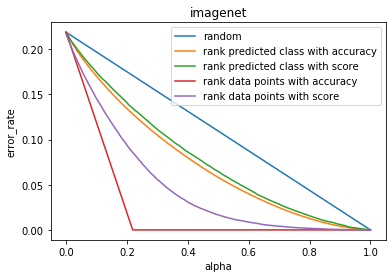

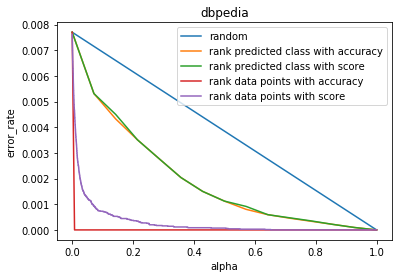

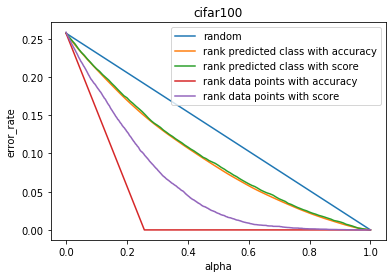

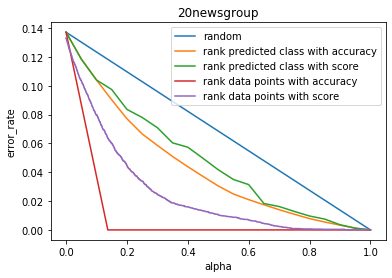

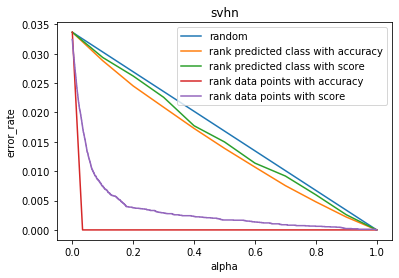

In [59]:
# datafile = datafile_dict['cifar100']
# num_classes = 100
for dataset in DATASET_LIST:
    
    if dataset == 'imagenet2_topimages':
        continue

    datafile = DATAFILE_LIST[dataset]
    num_classes = NUM_CLASSES_DICT[dataset]

    categories, observations, confidences, idx2category, category2idx, labels = prepare_data(datafile, False)
    num_samples = len(categories)

    # accuracy models
    accuracy_model = BetaBernoulli(k=num_classes, prior=None)
    accuracy_model.update_batch(categories, observations)
    accuracies_k = accuracy_model.eval
    
    # scores
    scores_k = get_confidence_k(categories, confidences, num_classes)
#     np.savetxt('../output/tmp/classwise_accuracies_%s.csv' % dataset, accuracies, delimiter=',')
#     np.savetxt('../output/tmp/classwise_scores_%s.csv' % dataset, scores_k, delimiter=',')
    
    
    # plot random
    plt.plot([0,1], [1-accuracies_k.mean(),0],label='random')
    
    # plot ground truth
    error_rate = 1 - accuracies_k
    error_rate = np.sort(error_rate)[::-1]
    error_rate_with_human = np.zeros(num_classes + 1)
    error_rate_with_human[0] = 1-accuracies_k.mean()
    for i in range(num_classes):
        error_rate[i] = 0
        error_rate_with_human[i + 1] = error_rate.mean()
    plt.plot(np.linspace(0, 1.0, num=num_classes+1), error_rate_with_human, label='rank predicted class with accuracy')
    
    
    # plot rank with score
    error_rate = 1 - accuracies_k
    order = scores_k.argsort()
    error_rate = error_rate[order]
    error_rate_with_human = np.zeros(num_classes + 1)
    error_rate_with_human[0] = 1-accuracies_k.mean()
    for i in range(num_classes):
        error_rate[i] = 0
        error_rate_with_human[i + 1] = error_rate.mean()
    plt.plot(np.linspace(0, 1.0, num=num_classes+1), error_rate_with_human, label='rank predicted class with score')
    
    
    # plot ground_truth with true labels of each data point
    theta = accuracies_k.mean()
    plt.plot([0, 1-theta, 1], [1-theta, 0, 0], label='rank data points with accuracy')
    
    # plot 
    order = np.array(confidences).argsort()
    observations = np.array(observations)[order] * 1.0
    error_rate_with_human = np.zeros(num_samples)
    for i in range(num_samples):
        observations[i] = 1
        error_rate_with_human[i] = 1 - observations.mean()
    plt.plot(np.arange(num_samples) / num_samples, error_rate_with_human, label = 'rank data points with score')
             
             
    plt.xlabel('alpha')
    plt.ylabel('error_rate')
    plt.title(dataset)
    plt.legend()
    plt.savefig('../output/tmp/%s.png' % dataset)
    plt.show()